**Anomly_Detection**


In [ ]:
!pip install -q tensorflow-io

     |████████████████████████████████| 25.0 MB 70.4 MB/s 


**Importing Required Libraries**

In [ ]:
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import cv2
import glob,os,errno

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Resizing normal_dadta to 256*256 dimensions**

In [ ]:
"""ORIGIN_PATH = "/content/drive/MyDrive/screw/normal_data/"
DESTIN_PATH = "/content/drive/MyDrive/screw/resized_normal_images/"
for filename in os.listdir(ORIGIN_PATH):                                                                                                                                                                
    img = Image.open(ORIGIN_PATH + filename)
    res_img = img.resize((256, 256))
    res_img.save(DESTIN_PATH + filename)"""

'ORIGIN_PATH = "/content/drive/MyDrive/screw/normal_data/"\nDESTIN_PATH = "/content/drive/MyDrive/screw/resized_normal_images/"\nfor filename in os.listdir(ORIGIN_PATH):                                                                                                                                                                \n    img = Image.open(ORIGIN_PATH + filename)\n    res_img = img.resize((256, 256))\n    res_img.save(DESTIN_PATH + filename)'

**Fetching images using glob function from drive**

In [ ]:
resized_train_images = [cv2.imread(file,0) for file in glob.glob("/content/drive/MyDrive/screw/resized_normal_images/*.png")]

In [ ]:
x_train = resized_train_images[:300]
x_test =  resized_train_images[300:]

In [ ]:
len(x_train),len(x_test)

(300, 20)

**Data Augmentation**

In [ ]:
##augmentaion part
#from keras.preprocessing.image import ImageDataGenerator
"""datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1, 
                              height_shift_range=0.1,
                              shear_range=0.15, 
                              zoom_range=0.1,
                              channel_shift_range = 10, 
                                horizontal_flip=True)
save_here = "/content/drive/MyDrive/screw/augmented_images/"
datagen.fit(x_train)
for x, val in zip(datagen.flow(x_train,                    #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'), range(10))"""

'datagen = ImageDataGenerator(rotation_range=10,\n                             width_shift_range=0.1, \n                              height_shift_range=0.1,\n                              shear_range=0.15, \n                              zoom_range=0.1,\n                              channel_shift_range = 10, \n                                horizontal_flip=True)\nsave_here = "/content/drive/MyDrive/screw/augmented_images/"\ndatagen.fit(x_train)\nfor x, val in zip(datagen.flow(x_train,                    #image we chose\n        save_to_dir=save_here,     #this is where we figure out where to save\n         save_prefix=\'aug\',        # it will save the images as \'aug_0912\' some number for every new augmented image\n        save_format=\'png\'), range(10))'

In [ ]:
"""datagen = ImageDataGenerator(
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train)"""


'datagen = ImageDataGenerator(\n        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)\n        zoom_range = 0.1, # Randomly zoom image \n        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)\n        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)\n        horizontal_flip=True,  # randomly flip images\n        vertical_flip=True)  # randomly flip images\n\n\ndatagen.fit(x_train)'

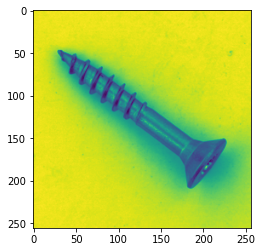

In [ ]:
plt.imshow(x_train[0].reshape(256,256))

**Resizing Anomly Images**

In [ ]:
"""ORIGIN_PATH1 = "/content/drive/MyDrive/screw/anomaly_data/"
DESTIN_PATH1 = "/content/drive/MyDrive/screw/resized_anomly_images/"
for filename in os.listdir(ORIGIN_PATH1):                                                                                                                                                                
    img = Image.open(ORIGIN_PATH1 + filename)
    res_img = img.resize((256, 256))
    res_img.save(DESTIN_PATH1 + filename)"""

'ORIGIN_PATH1 = "/content/drive/MyDrive/screw/anomaly_data/"\nDESTIN_PATH1 = "/content/drive/MyDrive/screw/resized_anomly_images/"\nfor filename in os.listdir(ORIGIN_PATH1):                                                                                                                                                                \n    img = Image.open(ORIGIN_PATH1 + filename)\n    res_img = img.resize((256, 256))\n    res_img.save(DESTIN_PATH1 + filename)'

**Fetching resized anomly images**

In [ ]:
anomly_img = [cv2.imread(file,0) for file in glob.glob("/content/drive/MyDrive/screw/resized_anomly_images/*.png")]

In [ ]:
anomly_img[0].shape

(256, 256)

In [ ]:
len(anomly_img)

42

In [ ]:
anomly_img[0]

array([[200, 201, 202, ..., 208, 209, 207],
       [199, 199, 200, ..., 206, 205, 207],
       [200, 197, 199, ..., 207, 205, 206],
       ...,
       [210, 209, 208, ..., 201, 199, 200],
       [210, 210, 209, ..., 201, 202, 202],
       [210, 211, 210, ..., 200, 203, 202]], dtype=uint8)

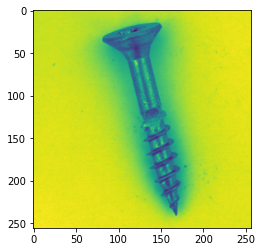

In [ ]:
plt.imshow(anomly_img[3])

**Normalization between 0 and 1**

In [ ]:
x_train = np.array(x_train)
x_train = x_train/255.0

In [ ]:
x_test = np.array(x_test)
x_test = x_test/255.0

In [ ]:
len(x_test)

20

In [ ]:
validate_img = np.array(anomly_img)
validate_img = validate_img/255.0


In [ ]:
inputs = tf.keras.Input(shape=(256, 256, 1), name='input_layer')

In [ ]:
#conv1
encoded = tf.keras.layers.Conv2D(256, kernel_size=3, strides= 1, padding='same', name='conv_1')(inputs)
#encoded = tf.keras.layers.BatchNormalization(name='batchnorm_1')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='relu_1')(encoded)
encoded = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name='pool_1')(encoded)
#conv2
encoded = tf.keras.layers.Conv2D(128, kernel_size=3, strides= 1, padding='same', name='conv_2')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_2')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='relu_2')(encoded)
encoded = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name='pool_2')(encoded)
#conv3 
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', name='conv_3')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_3')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='relu_3')(encoded)
encoded = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name='pool_3')(encoded)
#conv4 
encoded = tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', name='conv_4')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_4')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='relu_4')(encoded)
#encoded = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name='pool_4')(encoded)
"""#conv5 
encoded = tf.keras.layers.Conv2D(16, kernel_size=3, strides=2, padding='same', name='conv_5')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_4')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='relu_5')(encoded)"""

"#conv5 \nencoded = tf.keras.layers.Conv2D(16, kernel_size=3, strides=2, padding='same', name='conv_5')(encoded)\nencoded = tf.keras.layers.BatchNormalization(name='batchnorm_4')(encoded)\nencoded = tf.keras.layers.LeakyReLU(name='relu_5')(encoded)"

In [ ]:
#DeConv1
decoded = tf.keras.layers.Conv2DTranspose(32, 3, strides= 1, padding='same',name='conv_transpose_1')(encoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_5')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='relu_6')(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2),interpolation="bilinear",name="upsample_1")(decoded)
#DeConv2
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 1, padding='same',name='conv_transpose_2')(encoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_6')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='relu_7')(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2),interpolation="bilinear",name="upsample_2")(decoded)

#DeConv3
decoded = tf.keras.layers.Conv2DTranspose(128, 3, strides= 1, padding='same',name='conv_transpose_3')(encoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_7')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='relu_8')(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2),interpolation="bilinear",name="upsample_3")(decoded)
#DeConv4
decoded = tf.keras.layers.Conv2DTranspose(256, 3, strides= 1, padding='same', name='conv_transpose_4')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_8')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='relu_9')(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2),interpolation="bilinear",name="upsample_4")(decoded)
"""#DeConv4
decoded = tf.keras.layers.Conv2DTranspose(256, 3, strides= 2, padding='same', name='conv_transpose_5')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_9')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='relu_10')(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2),interpolation="bilinear",name="upsample_2")(decoded)"""


'#DeConv4\ndecoded = tf.keras.layers.Conv2DTranspose(256, 3, strides= 2, padding=\'same\', name=\'conv_transpose_5\')(decoded)\ndecoded = tf.keras.layers.BatchNormalization(name=\'batchnorm_9\')(decoded)\ndecoded = tf.keras.layers.LeakyReLU(name=\'relu_10\')(decoded)\ndecoded = tf.keras.layers.UpSampling2D((2, 2),interpolation="bilinear",name="upsample_2")(decoded)'

In [ ]:
# output
outputs = tf.keras.layers.Conv2DTranspose(1, kernel_size=3, strides= 2,padding='same', activation='sigmoid', name='conv_transpose_6')(decoded)

In [ ]:
def SSIMLoss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

In [ ]:
autoencoder = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(lr = 0.0005)
autoencoder.compile(optimizer=optimizer, loss=SSIMLoss)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 1)]     0         
                                                                 
 conv_1 (Conv2D)             (None, 256, 256, 256)     2560      
                                                                 
 relu_1 (LeakyReLU)          (None, 256, 256, 256)     0         
                                                                 
 pool_1 (MaxPooling2D)       (None, 128, 128, 256)     0         
                                                                 
 conv_2 (Conv2D)             (None, 128, 128, 128)     295040    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 128, 128, 128)    512       
 tion)                                                           
                                                           

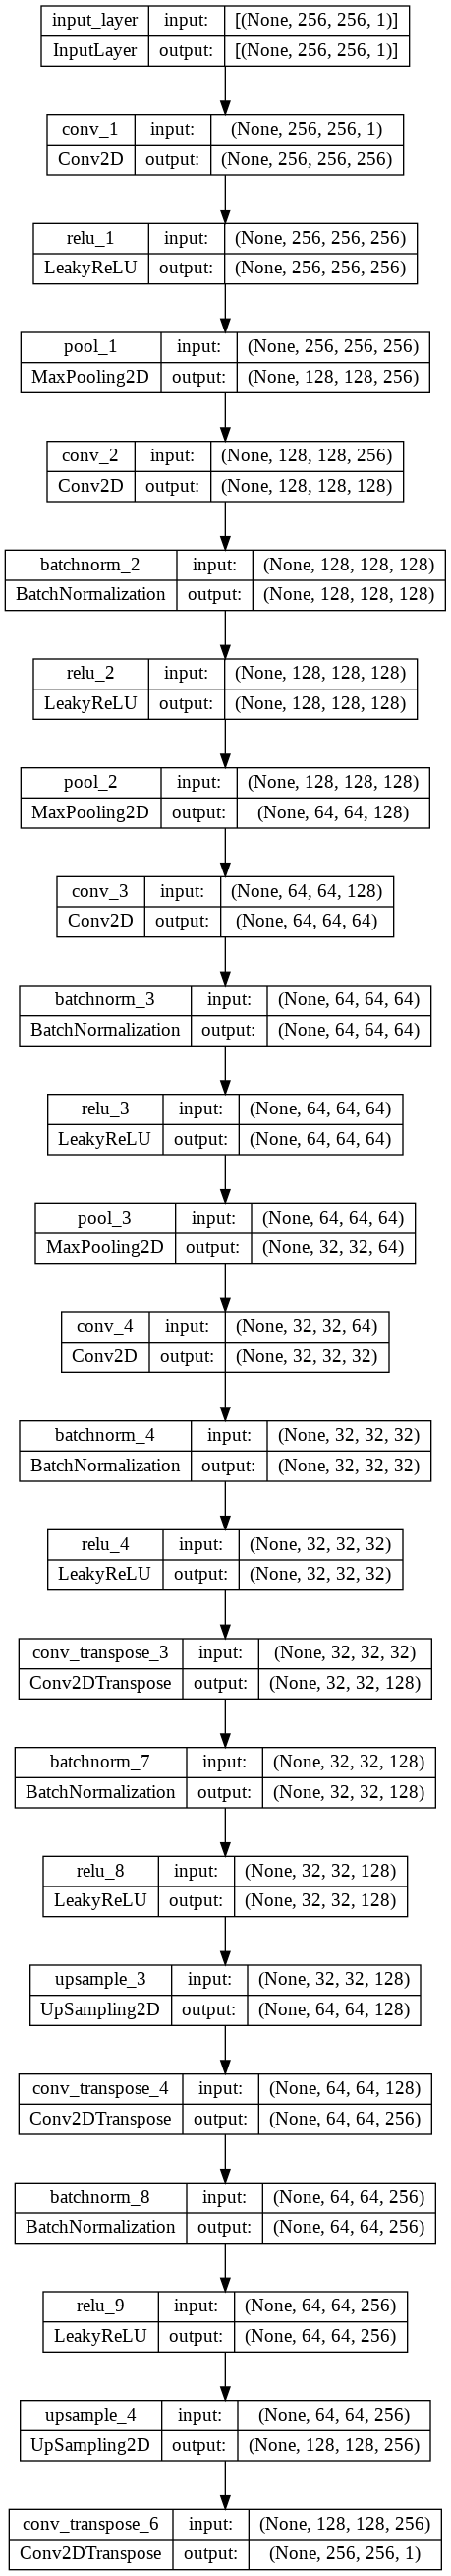

In [ ]:
dot_img_file = '/tmp/autoencoder.png'
tf.keras.utils.plot_model(autoencoder, to_file=dot_img_file, show_shapes=True)

**Fitting autoencoder model**

In [ ]:
hist=autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=16,
                validation_split = 0.1,
                
)

Epoch 1/100
17/17 [==============================] - 11s 406ms/step - loss: 0.2956 - val_loss: 0.6770
Epoch 2/100
17/17 [==============================] - 4s 231ms/step - loss: 0.0980 - val_loss: 0.6314
Epoch 3/100
17/17 [==============================] - 4s 233ms/step - loss: 0.0634 - val_loss: 0.6080
Epoch 4/100
17/17 [==============================] - 4s 234ms/step - loss: 0.0476 - val_loss: 0.5980
Epoch 5/100
17/17 [==============================] - 4s 236ms/step - loss: 0.0400 - val_loss: 0.5764
Epoch 6/100
17/17 [==============================] - 4s 236ms/step - loss: 0.0354 - val_loss: 0.5701
Epoch 7/100
17/17 [==============================] - 4s 237ms/step - loss: 0.0317 - val_loss: 0.5600
Epoch 8/100
17/17 [==============================] - 4s 237ms/step - loss: 0.0302 - val_loss: 0.5554
Epoch 9/100
17/17 [==============================] - 4s 244ms/step - loss: 0.0287 - val_loss: 0.5450
Epoch 10/100
17/17 [==============================] - 4s 235ms/step - loss: 0.0275 - val_l

In [ ]:
#autoencoder.save("/content/drive/MyDrive/screw/image_autoencoder.h5")

In [ ]:
#autoencoder =tf.keras.models.load_model('/content/drive/MyDrive/screw/image_autoencoder.h5', compile=False)

**Printing Reconstructed Images**

In [ ]:
print(x_test[0].shape)

(256, 256)


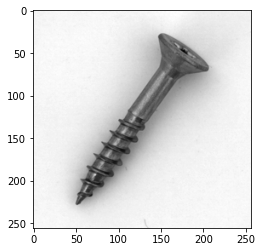

In [ ]:
plt.imshow(x_test[0])

1/1 [==============================] - 0s 160ms/step


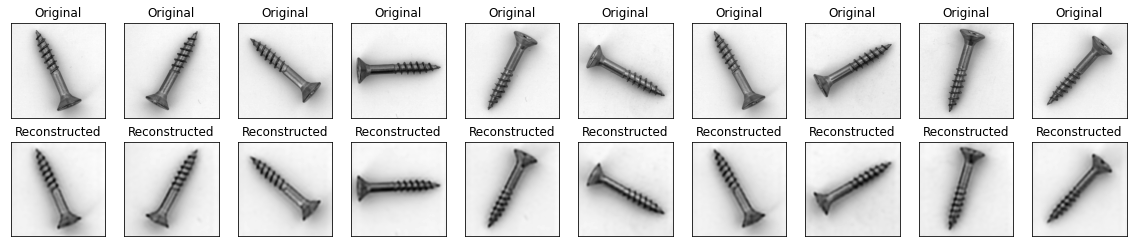

In [ ]:
decoded = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    a = decoded[i].reshape(256,256)
    plt.imshow(a)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
x_test[0].shape

(256, 256)

In [ ]:
decoded = autoencoder.predict(x_test)


1/1 [==============================] - 0s 19ms/step


In [ ]:
plt.imshow(decoded.reshape(256, 256))

**Printing reconstructed images of anomly data**

In [ ]:
validate_img[0].shape

(256, 256)

2/2 [==============================] - 0s 198ms/step


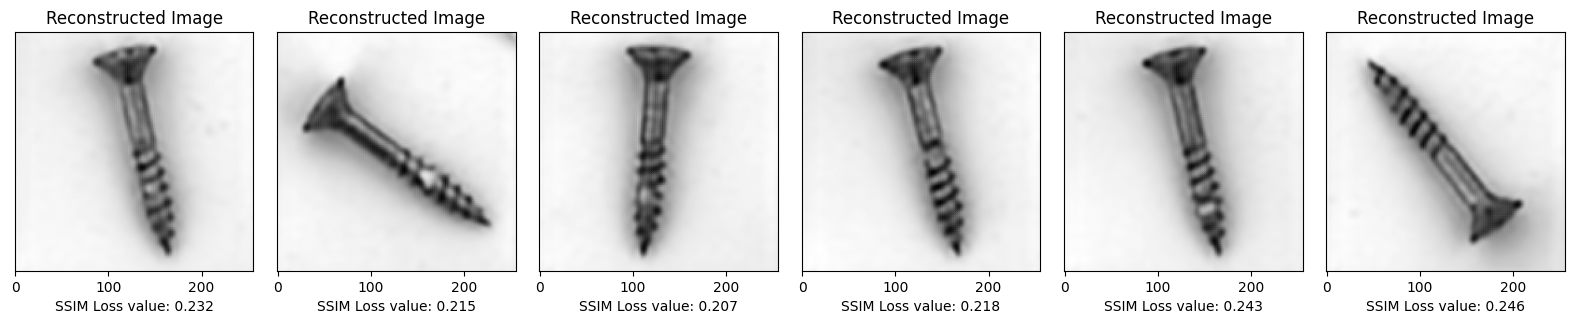

In [ ]:
n=6
plt_a=1
decoded_validate_img= autoencoder.predict(validate_img)
plt.figure(figsize=(20, 14), dpi=100)
plt.subplots_adjust( wspace=0.1, hspace=0.07)
for i in range(n):
    ax = plt.subplot(3, n, plt_a + n )
    plt.imshow(decoded_validate_img[i].reshape(256,256))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)    
    value_a = SSIMLoss(decoded_validate_img[i].astype(float), x_test[i].reshape(256,256,1))
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )
    plt_a+=1
      
plt.show()

**Compairing normal vs reconstructed vs anomly**

2/2 [==============================] - 0s 192ms/step


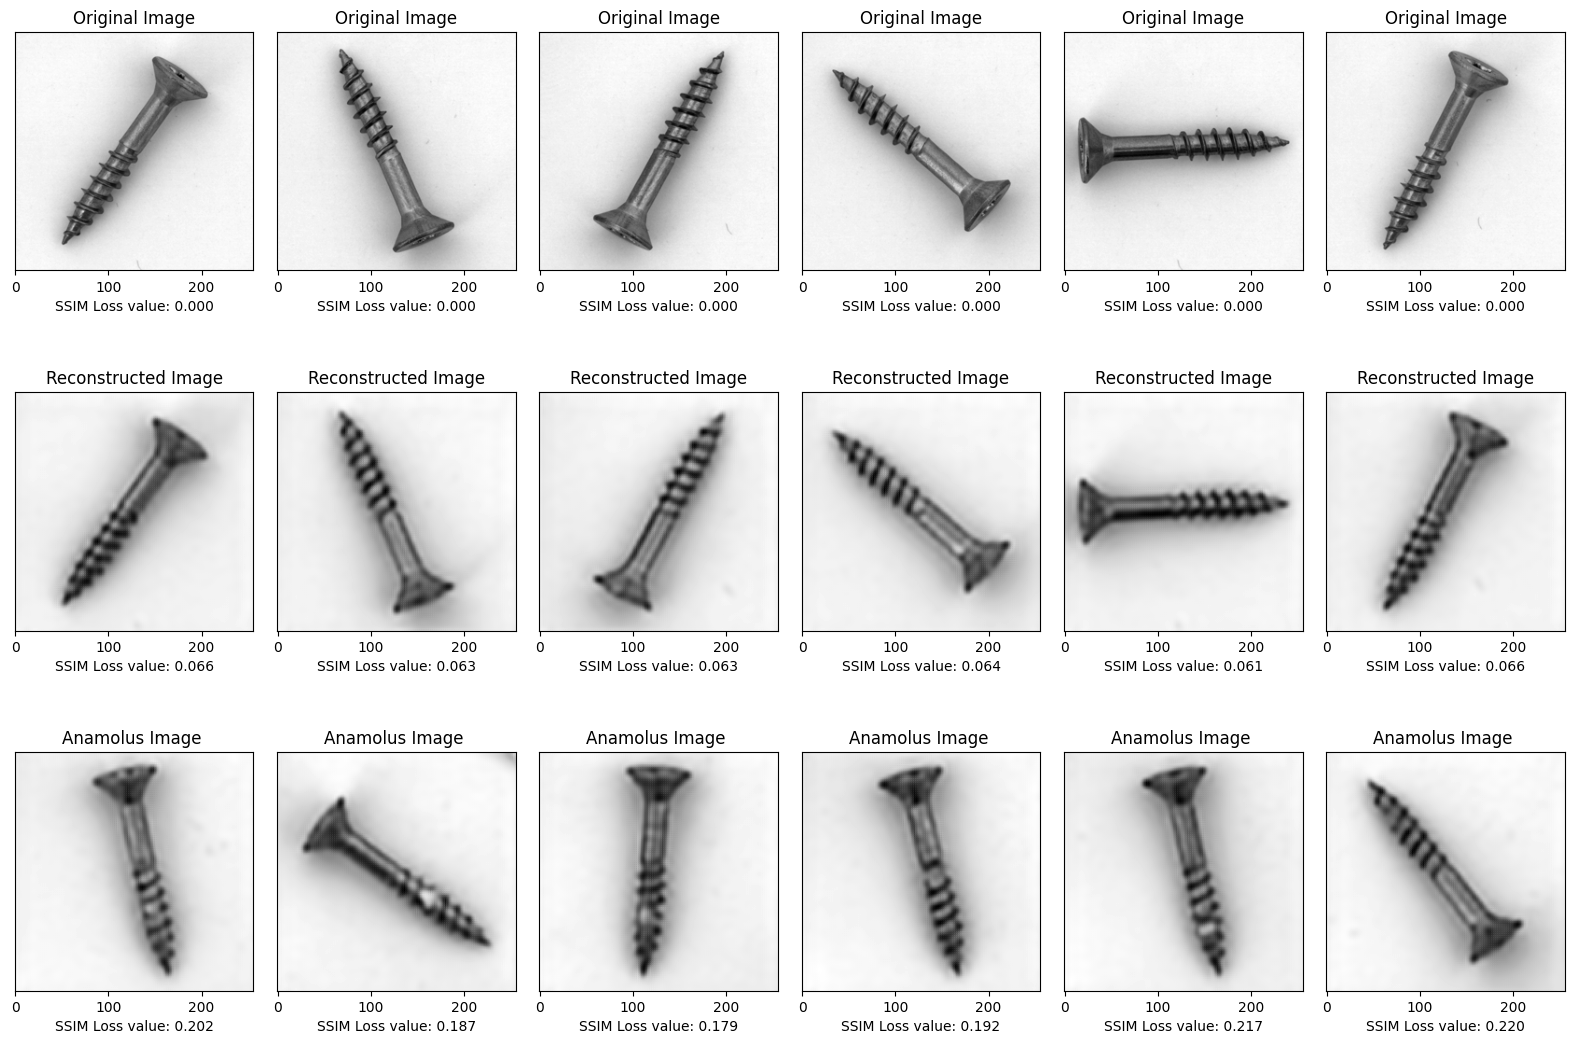

In [ ]:
%matplotlib inline
n = 6  # how many encoded and decoded images we will display
decoded_imgs= autoencoder.predict(x_test)
decoded_anolmy_images= autoencoder.predict(validate_img)
plt.figure(figsize=(20, 14), dpi=100)
plt.subplots_adjust( wspace=0.1, hspace=0.07)
plt_a=1
for i in range(n):
    # Original training dataset vs Original training
    ax = plt.subplot(3, n, plt_a   )
    plt.imshow(x_test[i].reshape(256,256))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value_a = SSIMLoss(x_test[i].reshape(256,256,1), x_test[i].reshape(256,256,1))
    ax.set_title("Original Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )
    
    # Reconstructed good data  vs Original training data
    ax = plt.subplot(3, n, plt_a + n )
    plt.imshow(decoded_imgs[i].reshape(256,256))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)    
    value_a = SSIMLoss(decoded_imgs[i].astype(float), x_test[i].reshape(256,256,1))
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )
    
    # Reconstructed anomalous data  vs Original training data
    ax = plt.subplot(3, n, plt_a + 2*n)
    plt.imshow(decoded_anolmy_images[i].reshape(256,256))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value = SSIMLoss(decoded_anolmy_images[i], decoded_imgs[i])
    label = 'SSIM Loss value: {:.3f}'
    ax.set_title("Anamolus Image " )
    ax.set_xlabel(label.format(value) )
    plt_a+=1
plt.show()

**Prediction**

In [ ]:
img = x_test[0]
img = img.reshape(1, 256, 256)
decoded_imgs = autoencoder.predict(img)

1/1 [==============================] - 0s 19ms/step


In [ ]:
autoencoder.evaluate(img,decoded_imgs)

1/1 [==============================] - 1s 682ms/step - loss: 0.0000e+00


0.0

In [ ]:
img1 = validate_img[0]
img1 = img1.reshape(1, 256, 256)
decoded_imgs = autoencoder.predict(img1)


1/1 [==============================] - 0s 15ms/step


In [ ]:
autoencoder.evaluate(img1,decoded_imgs)

1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00


0.0

**Average of all reconstructed values**

In [ ]:
"""rec_error = []
decoded_imgs= autoencoder.predict(x_test)
for i in range(x_train):
  value_a = autoencoder.evaluate(i,decoded_imgs)
  rec_error.append(value_a)"""